In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [2]:
train = pd.read_csv('Dataset/Train.csv')
test = pd.read_csv('Dataset/Test.csv')

In [3]:
train.head()

,Item_Id,Date,State_of_Country,Market_Category,Product_Category,Grade,Demand,Low_Cap_Price,High_Cap_Price
0,IT_1,2007-07-05,0,0,0,0,0.5,2785,4240
1,IT_2,2007-07-05,0,1,0,0,0.7,3574,4756
2,IT_3,2007-07-05,0,103,0,1,1.6,5978,9669
3,IT_4,2007-07-05,0,103,0,0,0.0,5681,8313
4,IT_5,2007-07-05,0,103,0,2,0.0,4924,7257


In [4]:
test.head()

,Item_Id,Date,State_of_Country,Market_Category,Product_Category,Grade,Demand,High_Cap_Price
0,IT_265079,2014-01-19,0,3,0,0,0.1,5303
1,IT_265087,2014-01-19,0,268,0,2,1.4,10492
2,IT_265107,2014-01-19,0,320,0,0,13.4,24706
3,IT_265139,2014-01-19,17,358,0,3,5.5,23464
4,IT_265142,2014-01-19,18,23,5,2,0.0,6222


In [7]:
print(train.nunique())

Item_Id             9798
Date                1070
State_of_Country      21
Market_Category      275
Product_Category      17
Grade                  4
Demand              1207
Low_Cap_Price       5392
High_Cap_Price      6468
dtype: int64


In [6]:
print(test.nunique())

Item_Id             5763
Date                 617
State_of_Country      20
Market_Category      240
Product_Category      17
Grade                  4
Demand               860
High_Cap_Price      4781
dtype: int64


In [9]:
categorical_feats = ['Item_Id', 'Date']
numerical_feats =[]
for col in train.columns:
    if col not in categorical_feats:
        numerical_feats.append(col)
numerical_feats

['State_of_Country',
 'Market_Category',
 'Product_Category',
 'Grade',
 'Demand',
 'Low_Cap_Price',
 'High_Cap_Price']

In [10]:
train[numerical_feats].describe()

,State_of_Country,Market_Category,Product_Category,Grade,Demand,Low_Cap_Price,High_Cap_Price
count,9798.000000,9798.000000,9798.000000,9798.000000,9798.000000,9798.000000,9798.000000
mean,14.278730,198.414064,2.492958,0.652072,71.977414,3500.273525,6349.838028
std,8.760964,169.767862,4.751807,1.032439,927.194052,2188.046803,3652.780956
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,163.000000
25%,3.000000,55.000000,0.000000,0.000000,0.500000,1863.250000,3878.250000
50%,20.000000,129.000000,0.000000,0.000000,2.000000,3124.000000,5552.500000
75%,21.000000,389.000000,1.000000,2.000000,10.175000,4667.500000,7993.750000
max,23.000000,471.000000,17.000000,3.000000,64160.500000,17580.000000,58812.000000


In [11]:
numerical_feats_test = numerical_feats[:5]
numerical_feats_test.append(numerical_feats[-1])
test[numerical_feats_test].describe()

,State_of_Country,Market_Category,Product_Category,Grade,Demand,High_Cap_Price
count,5763.000000,5763.000000,5763.000000,5763.00000,5763.000000,5.763000e+03
mean,15.926080,222.169356,4.547978,0.39823,67.695471,3.732109e+04
std,8.122655,145.683245,5.485450,0.81668,486.501858,1.998985e+06
min,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000e+00
25%,11.500000,65.000000,0.000000,0.00000,0.600000,7.244000e+03
50%,21.000000,238.000000,1.000000,0.00000,2.300000,9.364000e+03
75%,21.000000,340.000000,10.000000,0.00000,8.400000,1.256250e+04
max,23.000000,471.000000,17.000000,3.00000,13242.600000,1.517609e+08


Low_Cap_Price       1.000000
High_Cap_Price      0.721021
State_of_Country    0.234901
Market_Category     0.198524
Product_Category    0.180240
Demand             -0.057482
Grade              -0.079639
Name: Low_Cap_Price, dtype: float64

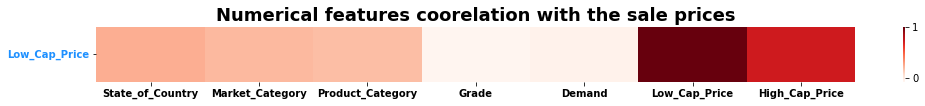

In [14]:
num = train.select_dtypes(exclude = 'object')
numcorr = num.corr()
f, ax = plt.subplots(figsize=(17,1))
sns.heatmap(numcorr.sort_values(by = ['Low_Cap_Price'], ascending = False).head(1), cmap='Reds')
plt.title("Numerical features coorelation with the sale prices", weight = 'bold', fontsize=18)
plt.xticks(weight = 'bold')
plt.yticks(weight = 'bold', color = 'dodgerblue', rotation = 0)
numcorr['Low_Cap_Price'].sort_values(ascending = False)

<AxesSubplot:>

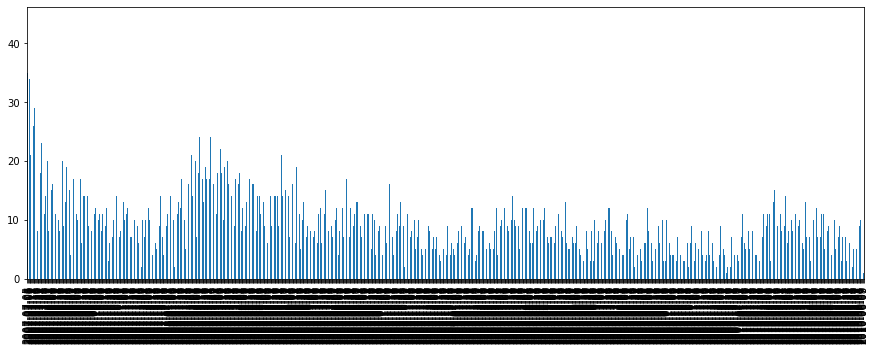

In [15]:
train['Date'].value_counts(sort=False).plot.bar(figsize = (15,5))

<AxesSubplot:>

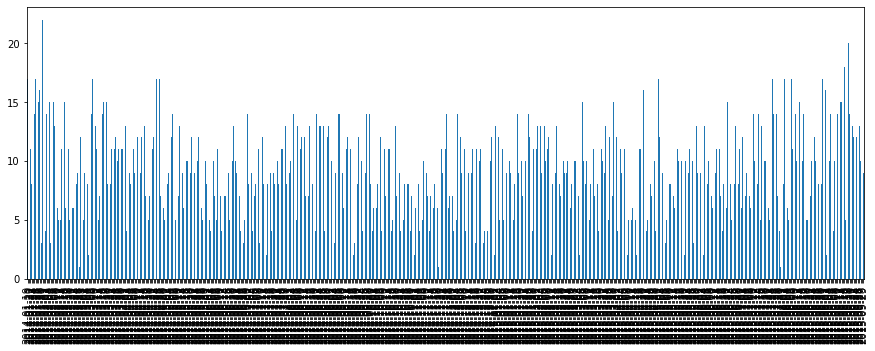

In [16]:
test['Date'].value_counts(sort=False).plot.bar(figsize=(15,5))

In [17]:
#Product category
res = set.intersection(*(set(df['Product_Category']) for df in [train, test]))

In [18]:
res

{0, 1, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17}

Train


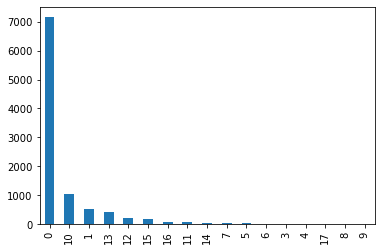

In [19]:
train['Product_Category'].value_counts().plot.bar()
print("Train")

Test


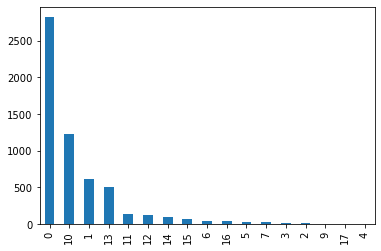

In [20]:
test['Product_Category'].value_counts().plot.bar()
print("Test")

<AxesSubplot:xlabel='Product_Category'>

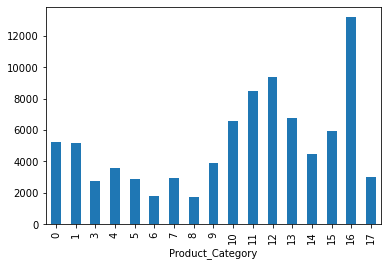

In [22]:
train.groupby('Product_Category')['High_Cap_Price'].median().plot.bar()

<AxesSubplot:xlabel='Product_Category'>

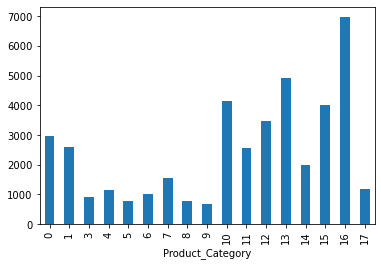

In [23]:
train.groupby('Product_Category')['Low_Cap_Price'].median().plot.bar()

<AxesSubplot:xlabel='Product_Category'>

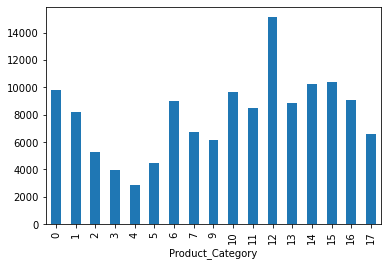

In [25]:
test.groupby('Product_Category')['High_Cap_Price'].median().plot.bar()

In [28]:
#state of country
unique_train = train[numerical_feats[0]].unique()
unique_train.sort()
print(unique_train)

[ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 17 18 19 20 21 22 23]


In [29]:
unique_test = test[numerical_feats[0]].unique()
unique_test.sort()
print(unique_test)

[ 0  1  2  3  4  5  6  7  8  9 11 12 15 17 18 19 20 21 22 23]


In [30]:
res = set.intersection(*(set(df[numerical_feats[0]]) for df in [train, test]))
res

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 17, 18, 19, 20, 21, 22, 23}

train


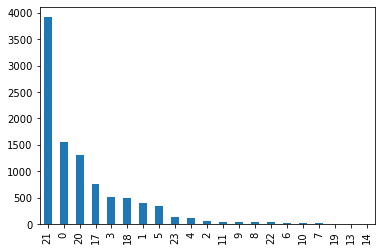

In [32]:
train[numerical_feats[0]].value_counts().plot.bar()
print("train")

test


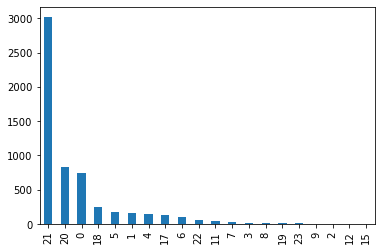

In [33]:
test[numerical_feats[0]].value_counts().plot.bar()
print("test")

<AxesSubplot:xlabel='State_of_Country'>

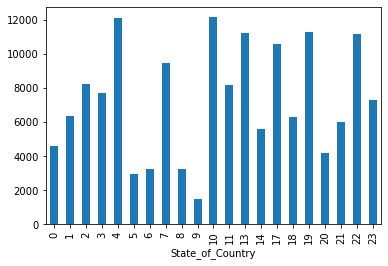

In [34]:
train.groupby(numerical_feats[0])['High_Cap_Price'].median().plot.bar()

<AxesSubplot:xlabel='State_of_Country'>

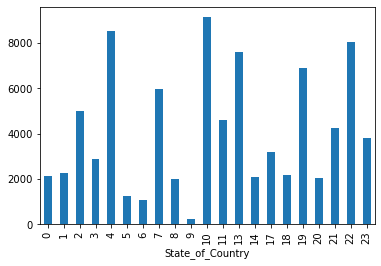

In [35]:
train.groupby(numerical_feats[0])['Low_Cap_Price'].median().plot.bar()

<AxesSubplot:xlabel='State_of_Country'>

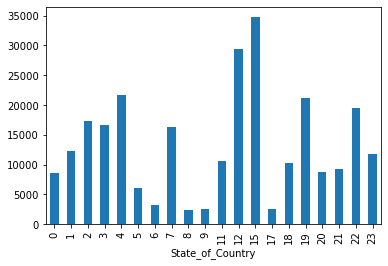

In [36]:
test.groupby(numerical_feats[0])['High_Cap_Price'].median().plot.bar()

<AxesSubplot:>

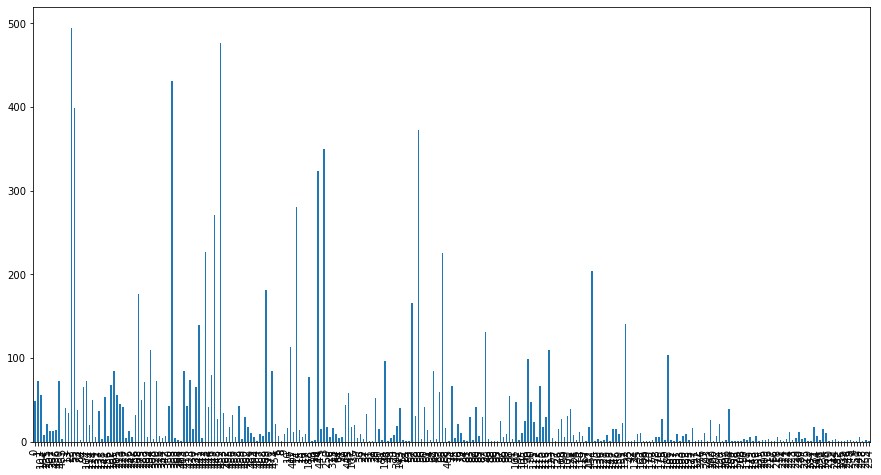

In [38]:
#market category
train[numerical_feats[1]].value_counts(sort=False).plot.bar(figsize=(15, 8))

<AxesSubplot:>

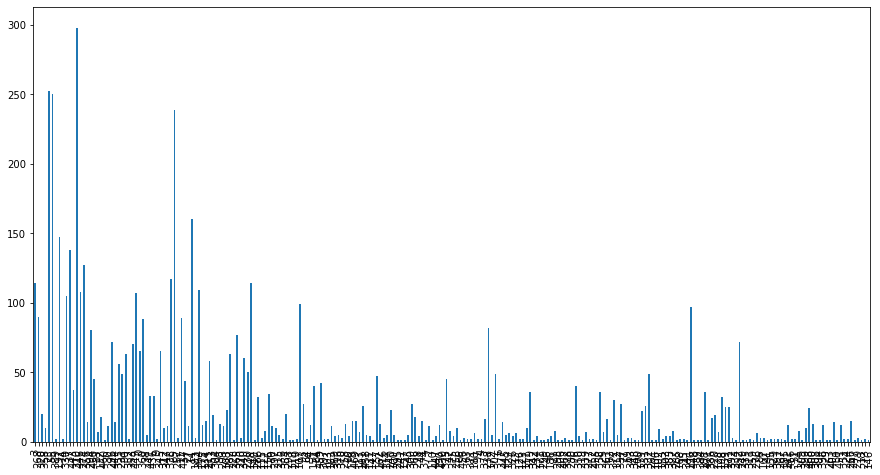

In [39]:
test[numerical_feats[1]].value_counts(sort=False).plot.bar(figsize=(15,8))

train


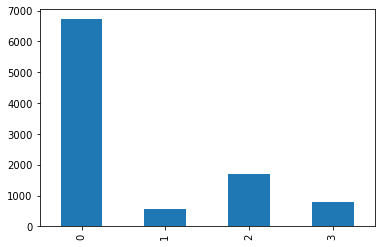

In [43]:
#Grade
train[numerical_feats[3]].value_counts(sort=False).plot.bar()
print("train")

test


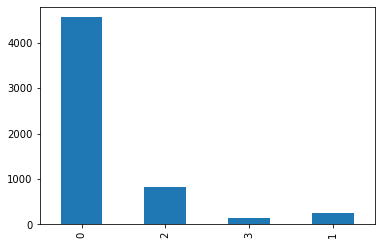

In [44]:
test[numerical_feats[3]].value_counts(sort=False).plot.bar()
print("test")

Demand


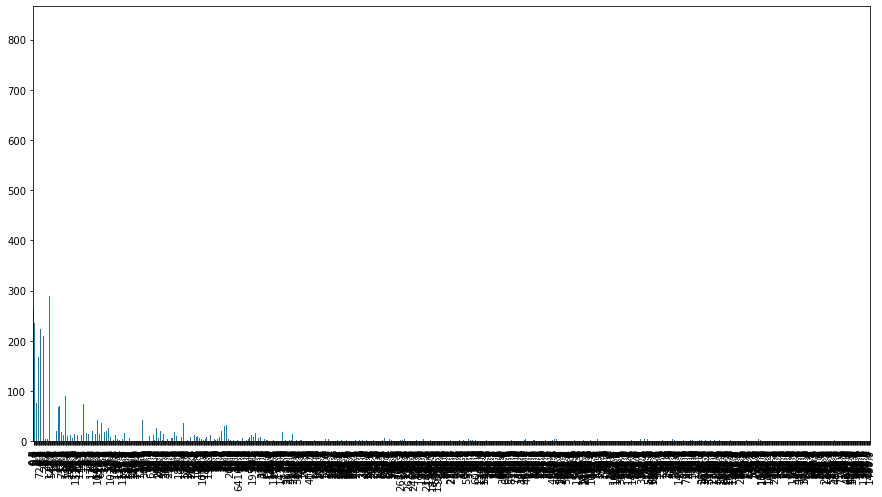

In [48]:
train[numerical_feats[4]].value_counts(sort=False).plot.bar(figsize=(15,8))
print(numerical_feats[4])

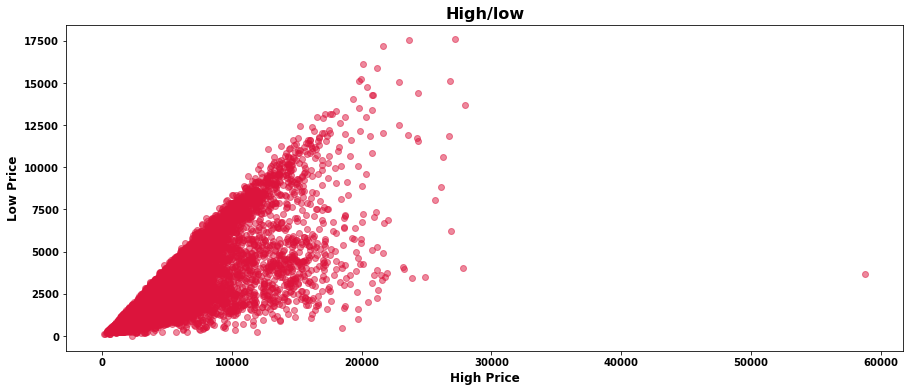

In [49]:
plt.figure(figsize=(15,6))
plt.scatter(x=train['High_Cap_Price'], y=train['Low_Cap_Price'], color='crimson', alpha=0.5)
plt.title('High/low', weight='bold', fontsize=16)
plt.xlabel('High Price', weight='bold', fontsize=12)
plt.ylabel('Low Price', weight='bold', fontsize=12)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.show()

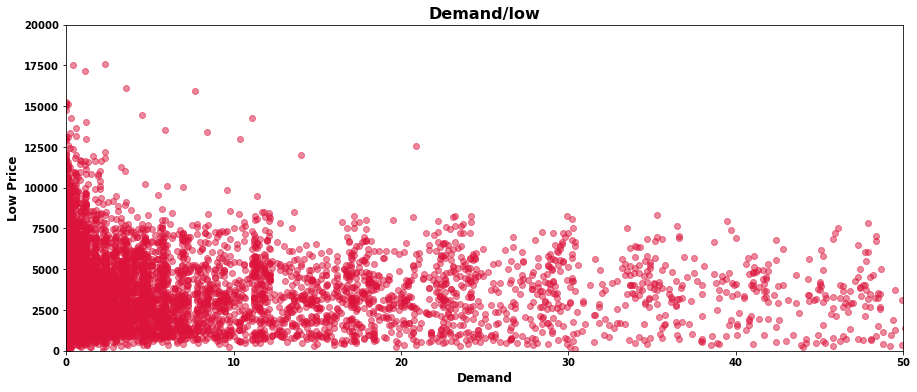

In [50]:
plt.figure(figsize=(15,6))
plt.scatter(x=train['Demand'], y=train['Low_Cap_Price'], color='crimson', alpha=0.5)
plt.title('Demand/low', weight='bold', fontsize=16)
plt.xlabel('Demand', weight='bold', fontsize=12)
plt.ylabel('Low Price', weight='bold', fontsize=12)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.axis([0, 50,0,20000])
plt.show()

In [51]:
#Let's set the threshold as 40(this is totally experimental), and categorize as low demand and high demand.
train['low_high']=train['Demand']>=40

In [52]:
test['low_high']=test['Demand']>=40

<AxesSubplot:>

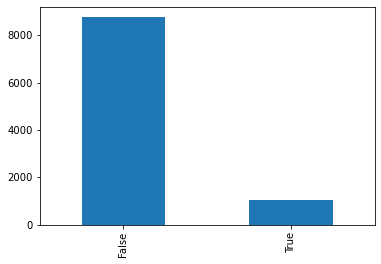

In [53]:
train['low_high'].value_counts().plot.bar()

<AxesSubplot:>

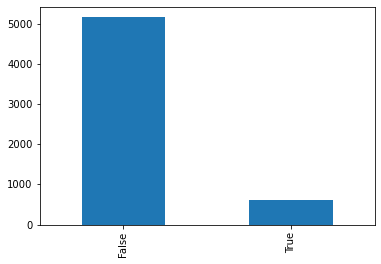

In [54]:
test['low_high'].value_counts().plot.bar()

In [55]:
from datetime import datetime  
train['Date'] = pd.to_datetime(train.Date,format='%Y-%m-%d') 
test['Date'] = pd.to_datetime(test.Date,format='%Y-%m-%d')
for i in (train, test):
    i['year']=i.Date.dt.year 
    i['month']=i.Date.dt.month 
    i['day']=i.Date.dt.day

In [56]:
train['day of week']=train['Date'].dt.dayofweek 
temp = train['Date']
test['day of week']=test['Date'].dt.dayofweek 

In [57]:
def applyer(row):
    if row.dayofweek ==4 or row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0 
temp2 = train['Date'].apply(applyer) 
train['weekend']=temp2

In [58]:
temp3 = test['Date'].apply(applyer) 
test['weekend']=temp3

Low_Cap_Price       1.000000
High_Cap_Price      0.721021
month               0.281381
State_of_Country    0.234901
Market_Category     0.198524
Product_Category    0.180240
weekend             0.014422
day of week         0.006135
year                0.001937
day                -0.014920
Demand             -0.057482
Grade              -0.079639
low_high           -0.120339
Name: Low_Cap_Price, dtype: float64

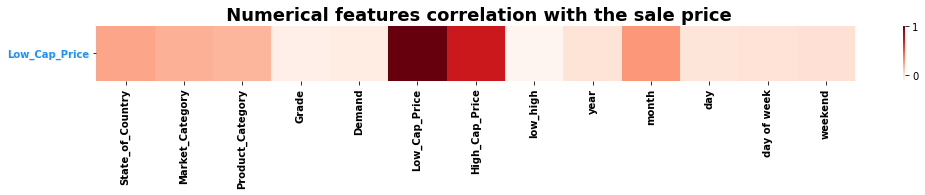

In [59]:
num=train.select_dtypes(exclude='object')
numcorr=num.corr()
f,ax=plt.subplots(figsize=(17,1))
sns.heatmap(numcorr.sort_values(by=['Low_Cap_Price'], ascending=False).head(1), cmap='Reds')
plt.title(" Numerical features correlation with the sale price", weight='bold', fontsize=18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='dodgerblue', rotation=0)
numcorr['Low_Cap_Price'].sort_values(ascending=False)

In [60]:
train.head()

,Item_Id,Date,State_of_Country,Market_Category,Product_Category,Grade,Demand,Low_Cap_Price,High_Cap_Price,low_high,year,month,day,day of week,weekend
0,IT_1,2007-07-05,0,0,0,0,0.5,2785,4240,False,2007,7,5,3,0
1,IT_2,2007-07-05,0,1,0,0,0.7,3574,4756,False,2007,7,5,3,0
2,IT_3,2007-07-05,0,103,0,1,1.6,5978,9669,False,2007,7,5,3,0
3,IT_4,2007-07-05,0,103,0,0,0.0,5681,8313,False,2007,7,5,3,0
4,IT_5,2007-07-05,0,103,0,2,0.0,4924,7257,False,2007,7,5,3,0


In [61]:
train.drop(['Date','Demand','year','Item_Id', 'day of week', 'day'],axis=1,inplace=True)
test.drop(['Date','Demand','year','Item_Id', 'day of week', 'day'],axis=1,inplace=True)

In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
scaler.fit(train.drop(['Low_Cap_Price'],axis=1))
scaled_features_train= scaler.transform(train.drop('Low_Cap_Price',axis=1))

In [63]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
scaler.fit(test)
scaled_features_train= scaler.transform(test)

In [64]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9798 entries, 0 to 9797
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   State_of_Country  9798 non-null   int64
 1   Market_Category   9798 non-null   int64
 2   Product_Category  9798 non-null   int64
 3   Grade             9798 non-null   int64
 4   Low_Cap_Price     9798 non-null   int64
 5   High_Cap_Price    9798 non-null   int64
 6   low_high          9798 non-null   bool 
 7   month             9798 non-null   int64
 8   weekend           9798 non-null   int64
dtypes: bool(1), int64(8)
memory usage: 622.1 KB


In [65]:
from sklearn.model_selection import train_test_split, cross_val_score
X= train[['State_of_Country','Market_Category','Product_Category','Grade','High_Cap_Price','low_high','month','weekend']]
y= train['Low_Cap_Price']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=101)

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [68]:
models=[]
models.append(('DTC',DecisionTreeRegressor()))
models.append(('KNC',KNeighborsRegressor()))
#models.append(('LR',LinearRegression()))
models.append(('RFC',RandomForestRegressor()))
#models.append(("MLP",MLPRegressor()))
models.append(("GBC",GradientBoostingRegressor()))

In [69]:
names=[]
for name,algo in models:
    algo.fit(X_train,y_train)
    prediction= algo.predict(X_test)
    a= metrics.mean_squared_log_error(y_test,prediction) 
    print("%s: %f "%(name, a))

DTC: 0.130586 
KNC: 0.160254 
RFC: 0.060228 
GBC: 0.103319 


In [70]:
rm= RandomForestRegressor(random_state=22, n_estimators=400)

In [71]:
rm.fit(X_train,y_train)

RandomForestRegressor(n_estimators=400, random_state=22)

In [72]:
X_= test[['State_of_Country','Market_Category','Product_Category','Grade','High_Cap_Price','low_high','month','weekend']]

In [73]:
prediction = rm.predict(X_)

In [74]:
rm2= RandomForestRegressor(random_state=101, n_estimators=400)

In [75]:
rm2.fit(X_train, y_train)

RandomForestRegressor(n_estimators=400, random_state=101)

In [76]:
prediction2= rm2.predict(X_)

In [77]:
gb= GradientBoostingRegressor(random_state=101, n_estimators=400)

In [78]:
gb.fit(X_train,y_train)

GradientBoostingRegressor(n_estimators=400, random_state=101)

In [79]:
pred=gb.predict(X_)

In [80]:
gb2= GradientBoostingRegressor(random_state=101, n_estimators=400)

In [81]:
gb2.fit(X_train,y_train)

GradientBoostingRegressor(n_estimators=400, random_state=101)

In [82]:
pred2=gb2.predict(X_)

In [83]:
gb3= GradientBoostingRegressor(random_state=101, n_estimators=400)

In [84]:
gb3.fit(X_train,y_train)

GradientBoostingRegressor(n_estimators=400, random_state=101)

In [85]:
pred3=gb3.predict(X_)

In [86]:
gb4= GradientBoostingRegressor()
gb4.fit(X_train,y_train)
pred4=gb4.predict(X_)


In [87]:
gb5= GradientBoostingRegressor()
gb5.fit(X_train,y_train)
pred5=gb5.predict(X_)

In [88]:
pre=(prediction+prediction2+pred+pred2+pred3+pred4+pred5)/7

In [91]:
pre

array([2498.56716555, 2596.85100129, 6761.09440367, ..., 6386.23863103,
       5836.13004709, 7325.78657178])

In [93]:
train.head()

,State_of_Country,Market_Category,Product_Category,Grade,Low_Cap_Price,High_Cap_Price,low_high,month,weekend
0,0,0,0,0,2785,4240,False,7,0
1,0,1,0,0,3574,4756,False,7,0
2,0,103,0,1,5978,9669,False,7,0
3,0,103,0,0,5681,8313,False,7,0
4,0,103,0,2,4924,7257,False,7,0


In [94]:
df = pd.read_csv('Dataset/Test.csv')

In [96]:
df.head()

,Item_Id,Date,State_of_Country,Market_Category,Product_Category,Grade,Demand,High_Cap_Price
0,IT_265079,2014-01-19,0,3,0,0,0.1,5303
1,IT_265087,2014-01-19,0,268,0,2,1.4,10492
2,IT_265107,2014-01-19,0,320,0,0,13.4,24706
3,IT_265139,2014-01-19,17,358,0,3,5.5,23464
4,IT_265142,2014-01-19,18,23,5,2,0.0,6222


In [97]:
ids = df['Item_Id'].values

In [98]:
out = pd.DataFrame(list(zip(ids, pre)), columns=['Item_Id', 'Low_Cap_Price'])

In [99]:
output = out.to_csv('submission.csv', index=False)